In [253]:
import pandas as pd
import numpy as np
import os

CAR_PATH = os.path.join("datasets", "used_cars")

def load_car_data(car_path=CAR_PATH):
    os.makedirs(car_path, exist_ok=True)
    csv_path = os.path.join(car_path, "used_car_dataset.csv")
    return pd.read_csv(csv_path)

In [254]:
cars = load_car_data()
cars.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,type,paint_color,F1,F2,F3,F4
0,21978.0,2016.0,ford,like new,6 cylinders,gas,80813.0,automatic,SUV,black,138,2.472286,0.059031,b
1,4185.0,2008.0,ford,good,8 cylinders,gas,201800.0,automatic,SUV,white,415,2.285245,0.046328,c
2,7693.0,2002.0,ford,excellent,6 cylinders,gas,145000.0,automatic,pickup,white,535,1.861461,0.158554,b
3,15778.0,2016.0,ford,excellent,4 cylinders,gas,50103.0,automatic,sedan,white,3435,2.331671,0.213665,c
4,10520.0,2005.0,ford,good,8 cylinders,gas,207663.0,automatic,truck,white,1212,2.061082,0.388724,b


In [255]:
cars.info()
cars = cars.drop(["fuel", "F2"], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         9997 non-null   float64
 1   year          9997 non-null   float64
 2   manufacturer  9997 non-null   object 
 3   condition     9997 non-null   object 
 4   cylinders     9997 non-null   object 
 5   fuel          9997 non-null   object 
 6   odometer      9305 non-null   float64
 7   transmission  9997 non-null   object 
 8   type          9997 non-null   object 
 9   paint_color   9997 non-null   object 
 10  F1            9997 non-null   int64  
 11  F2            9997 non-null   float64
 12  F3            9997 non-null   float64
 13  F4            9997 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 1.1+ MB


In [256]:
def detect_outliers(column):
    Q1 = cars[column].quantile(.25)
    Q3 = cars[column].quantile(.75)
    IQR = (Q3 - Q1)
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    print(Q1 , "," , Q3)
    return lower_range,upper_range

lower_range,upper_range = detect_outliers("F3")
print(upper_range)

cars.drop(cars[(cars.odometer > 999999)].index , inplace=True)
cars.drop(cars[(cars.price > 100000) | (cars.price <= 5)].index , inplace=True)
cars.drop(cars[(cars.F1 > 22000)].index , inplace=True)

0.030308433133183942 , 0.16765359101104135
0.3736713278278275


In [257]:
cars["paint_color"].value_counts()
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9846 entries, 0 to 9996
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         9846 non-null   float64
 1   year          9846 non-null   float64
 2   manufacturer  9846 non-null   object 
 3   condition     9846 non-null   object 
 4   cylinders     9846 non-null   object 
 5   odometer      9173 non-null   float64
 6   transmission  9846 non-null   object 
 7   type          9846 non-null   object 
 8   paint_color   9846 non-null   object 
 9   F1            9846 non-null   int64  
 10  F3            9846 non-null   float64
 11  F4            9846 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 1000.0+ KB


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'odometer'}>,
        <AxesSubplot:title={'center':'F1'}>],
       [<AxesSubplot:title={'center':'F3'}>, <AxesSubplot:>]],
      dtype=object)

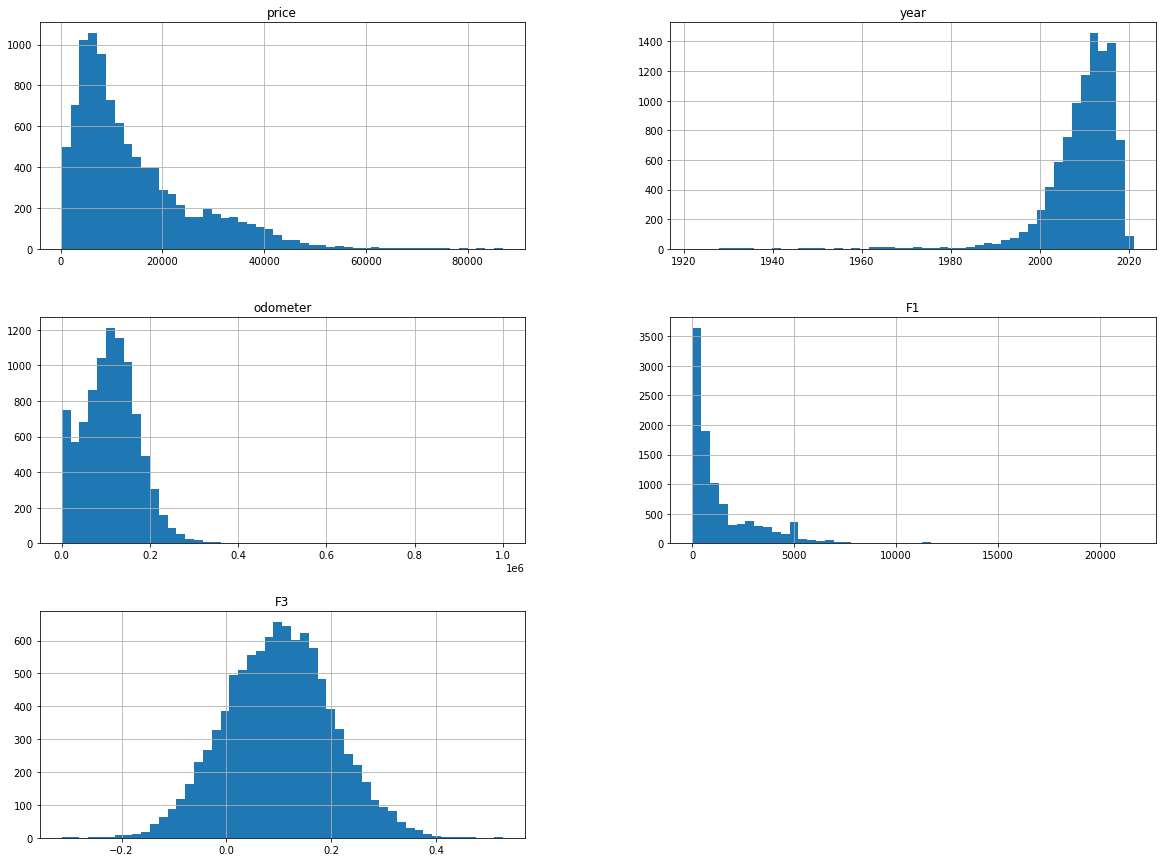

In [258]:
%matplotlib inline
import matplotlib.pyplot as plt
cars.hist(bins=50, figsize=(20,15))

In [259]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(cars, test_size=0.2, random_state=42)

In [260]:
cars_train_copy = train_set.copy()

,price,year,manufacturer,condition,cylinders,odometer,transmission,type,paint_color,F1,F3,F4
5694,9916.0,2007.0,ford,excellent,8 cylinders,152390.0,automatic,pickup,white,1346,0.072477,b
636,5517.0,2012.0,subaru,good,4 cylinders,219000.0,automatic,sedan,silver,122,0.194140,b
1951,7517.0,2014.0,ford,excellent,4 cylinders,106213.0,automatic,sedan,black,540,0.079524,a
5752,10212.0,2015.0,ford,excellent,4 cylinders,163000.0,automatic,sedan,white,3337,0.239256,b
7397,5928.0,1972.0,ford,fair,8 cylinders,NaN,manual,pickup,red,455,-0.013003,a
...,...,...,...,...,...,...,...,...,...,...,...,...
5824,4042.0,2008.0,subaru,good,4 cylinders,163111.0,automatic,sedan,blue,832,0.011655,c
5275,5513.0,2008.0,ford,excellent,6 cylinders,186189.0,automatic,SUV,silver,95,0.047308,b
5476,9314.0,1990.0,ford,good,8 cylinders,56233.0,manual,truck,white,229,0.164413,c
873,7419.0,2012.0,ford,excellent,4 cylinders,NaN,automatic,SUV,black,4509,0.020210,b


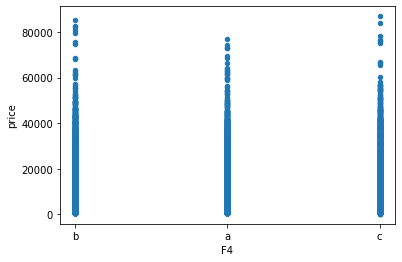

In [261]:
cars_train_copy.plot(kind="scatter", x="F4", y="price")
cars_train_copy

In [262]:
corr_matrix = cars_train_copy.corr()
corr_matrix["price"].sort_values(ascending=False)

price       1.000000
year        0.358874
F1          0.220838
F3          0.118506
odometer   -0.500463
Name: price, dtype: float64

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='year', ylabel='price'>,
        <AxesSubplot:xlabel='F1', ylabel='price'>,
        <AxesSubplot:xlabel='F3', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='year'>,
        <AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='F1', ylabel='year'>,
        <AxesSubplot:xlabel='F3', ylabel='year'>],
       [<AxesSubplot:xlabel='price', ylabel='F1'>,
        <AxesSubplot:xlabel='year', ylabel='F1'>,
        <AxesSubplot:xlabel='F1', ylabel='F1'>,
        <AxesSubplot:xlabel='F3', ylabel='F1'>],
       [<AxesSubplot:xlabel='price', ylabel='F3'>,
        <AxesSubplot:xlabel='year', ylabel='F3'>,
        <AxesSubplot:xlabel='F1', ylabel='F3'>,
        <AxesSubplot:xlabel='F3', ylabel='F3'>]], dtype=object)

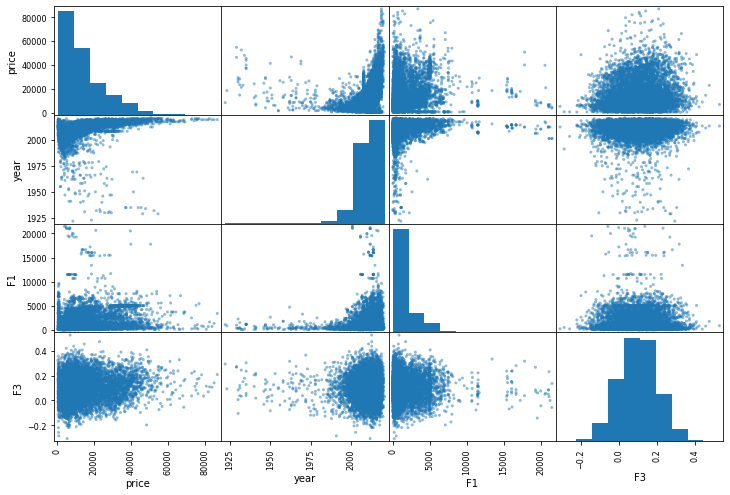

In [263]:
from pandas.plotting import scatter_matrix

attributes = ["price", "year", "F1", "F3"]
scatter_matrix(cars_train_copy[attributes], figsize=(12, 8))

In [264]:
cars = train_set.drop("price", axis=1)
cars_labels = train_set["price"].copy()
cars_test_y = test_set["price"].copy()

In [265]:
mean = cars["odometer"].mean()
cars["odometer"].fillna(mean, inplace=True)

In [266]:
cars_f4 = cars[["F4"]]
cars_f4.head(10)

,F4
5694,b
636,b
1951,a
5752,b
7397,a
8729,a
1272,a
1213,c
5819,c
3975,a


In [267]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
cars_f4_encoded = ordinal_encoder.fit_transform(cars_f4)
cars_f4_encoded[:10]

array([[1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [0.]])

In [268]:
# from sklearn.preprocessing import OrdinalEncoder

# cars_cylinder = cars[["cylinders"]]

# ordinal_encoder = OrdinalEncoder()
# cars_cylinder_encoded = ordinal_encoder.fit_transform(cars_cylinder)
# cars_cylinder_encoded[:10]

In [269]:
ordinal_encoder.categories_

[array(['a', 'b', 'c'], dtype=object)]

In [270]:
cars.head()

,year,manufacturer,condition,cylinders,odometer,transmission,type,paint_color,F1,F3,F4
5694,2007.0,ford,excellent,8 cylinders,152390.000000,automatic,pickup,white,1346,0.072477,b
636,2012.0,subaru,good,4 cylinders,219000.000000,automatic,sedan,silver,122,0.194140,b
1951,2014.0,ford,excellent,4 cylinders,106213.000000,automatic,sedan,black,540,0.079524,a
5752,2015.0,ford,excellent,4 cylinders,163000.000000,automatic,sedan,white,3337,0.239256,b
7397,1972.0,ford,fair,8 cylinders,111360.633229,manual,pickup,red,455,-0.013003,a


In [271]:
from sklearn.preprocessing import OrdinalEncoder

cars_condition = cars[["condition"]]

ordinal_encoder = OrdinalEncoder()
cars_condition_encoded = ordinal_encoder.fit_transform(cars_condition)
cars_condition_encoded[:10]
ordinal_encoder.categories_

[array(['excellent', 'fair', 'good', 'like new'], dtype=object)]

In [272]:
cars_num = cars.drop(["condition", "cylinders", "transmission", "type", "paint_color", "manufacturer", "F4"], axis=1)

In [273]:
cars_num

,year,odometer,F1,F3
5694,2007.0,152390.000000,1346,0.072477
636,2012.0,219000.000000,122,0.194140
1951,2014.0,106213.000000,540,0.079524
5752,2015.0,163000.000000,3337,0.239256
7397,1972.0,111360.633229,455,-0.013003
...,...,...,...,...
5824,2008.0,163111.000000,832,0.011655
5275,2008.0,186189.000000,95,0.047308
5476,1990.0,56233.000000,229,0.164413
873,2012.0,111360.633229,4509,0.020210


In [274]:
cars_num["year"] = 2021 - cars_num["year"]

In [275]:
cars_num

,year,odometer,F1,F3
5694,14.0,152390.000000,1346,0.072477
636,9.0,219000.000000,122,0.194140
1951,7.0,106213.000000,540,0.079524
5752,6.0,163000.000000,3337,0.239256
7397,49.0,111360.633229,455,-0.013003
...,...,...,...,...
5824,13.0,163111.000000,832,0.011655
5275,13.0,186189.000000,95,0.047308
5476,31.0,56233.000000,229,0.164413
873,9.0,111360.633229,4509,0.020210


In [276]:
cars_num.describe()

,year,odometer,F1,F3
count,7876.000000,7876.000000,7876.000000,7876.000000
mean,11.193499,111360.633229,1510.937405,0.099735
std,8.813936,62290.957888,2066.933655,0.100648
min,0.000000,0.000000,4.000000,-0.308592
25%,6.000000,71495.000000,309.000000,0.030096
50%,9.000000,111360.633229,690.500000,0.100558
75%,14.000000,147635.250000,1965.250000,0.167149
max,99.000000,999999.000000,21466.000000,0.526848


In [277]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

cars_num_tr = num_pipeline.fit_transform(cars_num)

In [278]:
cars_num

,year,odometer,F1,F3
5694,14.0,152390.000000,1346,0.072477
636,9.0,219000.000000,122,0.194140
1951,7.0,106213.000000,540,0.079524
5752,6.0,163000.000000,3337,0.239256
7397,49.0,111360.633229,455,-0.013003
...,...,...,...,...
5824,13.0,163111.000000,832,0.011655
5275,13.0,186189.000000,95,0.047308
5476,31.0,56233.000000,229,0.164413
873,9.0,111360.633229,4509,0.020210


In [279]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attr = list(cars_num)
print(num_attr)
cat_attr = ["condition", "cylinders", "transmission", "type", "paint_color", "manufacturer", "F4"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attr),
        ("cat", OneHotEncoder(), cat_attr),
    ])

cars_prepared = full_pipeline.fit_transform(cars)

['year', 'odometer', 'F1', 'F3']


In [280]:
cars_prepared[0:4]

array([[-0.31843649,  0.65871473, -0.07980318, -0.27085153,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ],
       [ 0.24888295,  1.72811921, -0.67202234,  0.93802791,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ],
       [ 0.47581073, -0.08264378, -0.46977756, -0.20082594,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.    

In [281]:
cars.describe()
cars_prepared

array([[-3.18436489e-01,  6.58714734e-01, -7.98031791e-02, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 2.48882953e-01,  1.72811921e+00, -6.72022339e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 4.75810730e-01, -8.26437773e-02, -4.69777560e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-2.24732259e+00, -8.85058364e-01, -6.20251546e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 2.48882953e-01,  2.33626832e-16,  1.45058016e+00, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-2.24732259e+00,  1.06778884e+00, -4.88163449e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [282]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lin_reg = LinearRegression()
lin_reg.fit(cars_prepared, cars_labels)

LinearRegression()

In [283]:
some_data = cars.iloc[:5]
some_labels = cars_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

print("Labels:", list(some_labels))

Predictions: [15193.51699019   811.87371759  9036.90682101  6480.20458576
  1792.89315872]
Labels: [9916.0, 5517.0, 7517.0, 10212.0, 5928.0]


In [284]:
from sklearn.metrics import mean_squared_error
import numpy as np
car_predictions = lin_reg.predict(cars_prepared)
lin_mse = mean_squared_error(cars_labels, car_predictions)
lin_rmse = np.sqrt(lin_mse)
print("R^2:", r2_score(cars_labels, car_predictions))
lin_rmse

R^2: 0.4868693993071137


8540.225746991948

In [285]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

lin_scores = cross_val_score(lin_reg, cars_prepared, cars_labels,
                              scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [8765.15828603 9203.87451962 8936.99612472 8828.77855608 7967.43388101
 8082.83388201 8299.41679716 7908.26037606 8550.09243431 9096.47004419]
Mean: 8563.93149011927
Standard deviation: 450.58476052658864


In [310]:
from sklearn import datasets
from scipy import stats 
lin_reg.coef_
stats.ttest_ind(cars_labels, car_predictions)

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [287]:
cars_labels.mean()

14316.503301168106

In [288]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(cars_prepared, cars_labels)

some_data = cars.iloc[:5]
some_labels = cars_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", forest_reg.predict(some_data_prepared))

print("Labels:", list(some_labels))

car_predictions = forest_reg.predict(cars_prepared)
forest_mse = mean_squared_error(cars_labels, car_predictions)
forest_rmse = np.sqrt(forest_mse)

print("R^2:", r2_score(cars_labels, forest_reg.predict(cars_prepared)))
forest_rmse

Predictions: [9345.47 6503.7  8088.55 9697.1  5046.65]
Labels: [9916.0, 5517.0, 7517.0, 10212.0, 5928.0]
R^2: 0.9707627056788855


2038.56227570009

In [289]:
forest_scores = cross_val_score(forest_reg, cars_prepared, cars_labels,
                              scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [5599.1935934  6465.77878998 5245.02478468 5503.86545001 4978.44736091
 5534.60035687 5245.13375255 4708.92600777 6128.18742446 5586.80294599]
Mean: 5499.596046664692
Standard deviation: 487.20807746692174


In [290]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 14, 16, 18]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(cars_prepared, cars_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 14, 16, 18],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [291]:
grid_search.best_params_

{'max_features': 14, 'n_estimators': 30}

In [292]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

7211.239395074917 {'max_features': 2, 'n_estimators': 3}
6526.719470173397 {'max_features': 2, 'n_estimators': 10}
6226.640341320569 {'max_features': 2, 'n_estimators': 30}
6479.992685585325 {'max_features': 14, 'n_estimators': 3}
5692.255076898895 {'max_features': 14, 'n_estimators': 10}
5506.710976873014 {'max_features': 14, 'n_estimators': 30}
6430.949859506707 {'max_features': 16, 'n_estimators': 3}
5754.3359582332005 {'max_features': 16, 'n_estimators': 10}
5541.141736722396 {'max_features': 16, 'n_estimators': 30}
6512.6108184013665 {'max_features': 18, 'n_estimators': 3}
5769.351727058246 {'max_features': 18, 'n_estimators': 10}
5575.309353880901 {'max_features': 18, 'n_estimators': 30}
7272.16354215948 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
6416.059758974233 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
6925.289928505396 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
6107.4664372656025 {'bootstrap': False, 'max_features': 3, 'n_esti

In [328]:
feature_importances = grid_search.best_estimator_.feature_importances_
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[6])
attributes = num_attr + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.38425780284940253, 'year'),
 (0.20447806229148272, 'odometer'),
 (0.07868915138401418, 'F1'),
 (0.055529963402093076, 'F3'),
 (0.008289472363100412, 'c'),
 (0.007647080550325011, 'a'),
 (0.0035507541985048113, 'b')]

In [294]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [295]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(cars_prepared, cars_labels)
ridgecv.alpha_

0.015269277544167062

In [296]:
ridge_reg = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge_reg.fit(cars_prepared, cars_labels)

some_data = cars.iloc[:5]
some_labels = cars_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", ridge_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))
car_predictions = ridge_reg.predict(cars_prepared)
ridge_mse = mean_squared_error(cars_labels, car_predictions)
ridge_rmse = np.sqrt(ridge_mse)

print("R^2:", r2_score(cars_labels, car_predictions))
ridge_rmse

Predictions: [15209.09439389   914.78239789  9089.42594063  6609.22579143
  1862.59835943]
Labels: [9916.0, 5517.0, 7517.0, 10212.0, 5928.0]
R^2: 0.48680557408776937


8540.756864052606

In [297]:
ridge_scores = cross_val_score(ridge_reg, cars_prepared, cars_labels,
                              scoring="neg_mean_squared_error", cv=10)
ridge_rmse_scores = np.sqrt(-ridge_scores)
display_scores(ridge_rmse_scores)

Scores: [8752.70292779 9211.74073917 8930.3736051  8821.76223104 7971.44763046
 8087.33466024 8294.96067811 7910.54840936 8552.8843445  9104.92549915]
Mean: 8563.86807249166
Standard deviation: 450.1423020095671


In [298]:
ridge_reg.coef_

array([ 3120.28537976, -4508.70571774,   953.29653188,  1144.73783706,
         339.66449798, -5125.83739223,  -948.90668872,  3217.98775128,
       -2871.63549146,  1046.96298519,  1748.3370836 , -1187.13085177,
        1187.13085177, -1958.11584332,  4117.34558045, -4742.19832234,
        3968.63246996,  1367.33326506,   -35.68359665,    86.15415029,
        -593.2792315 ,  -672.18913362, -1313.50385302,  1313.50385302,
        -268.21033989,   -59.29091028,   341.31802971])

In [299]:
from sklearn.preprocessing import scale 

lasso = Lasso(max_iter = 30000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(cars_prepared), cars_labels)
    coefs.append(lasso.coef_)

In [300]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(cars_prepared, cars_labels)

lasso.set_params(alpha=lassocv.alpha_)
print(lassocv.alpha_)
lasso.fit(cars_prepared, cars_labels)

some_data = cars.iloc[:5]
some_labels = cars_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lasso.predict(some_data_prepared))

print("Labels:", list(some_labels))
car_predictions = lasso.predict(cars_prepared)
lasso_mse = mean_squared_error(cars_labels, car_predictions)
lasso_rmse = np.sqrt(lasso_mse)

print("R^2:", r2_score(cars_labels, car_predictions))
lasso_rmse

0.06542206800935042
Predictions: [15187.66072144   823.50730237  9052.51580227  6501.4944929
  1802.25390542]
Labels: [9916.0, 5517.0, 7517.0, 10212.0, 5928.0]
R^2: 0.4868650122482364


8540.262254650082

In [301]:
lasso_scores = cross_val_score(lasso, cars_prepared, cars_labels,
                              scoring="neg_mean_squared_error", cv=10)
lasso_rmse_scores = np.sqrt(-lasso_scores)
display_scores(lasso_rmse_scores)

Scores: [8763.40354752 9205.00067051 8937.69369186 8828.8400779  7967.83313623
 8082.10908419 8298.36151679 7908.58582182 8550.79392242 9096.51662088]
Mean: 8563.91380901199
Standard deviation: 450.7709492845097


In [302]:
lasso.coef_

array([ 3.15668448e+03, -4.56707878e+03,  9.44199575e+02,  1.15448105e+03,
        0.00000000e+00, -5.44047817e+03, -1.27513029e+03,  2.87476364e+03,
       -3.94942348e+03,  0.00000000e+00,  7.11573379e+02, -2.41689228e+03,
        1.84850200e-10, -0.00000000e+00,  6.12307683e+03, -2.81221972e+03,
        5.97334510e+03,  1.41405559e+03,  0.00000000e+00,  1.11877879e+02,
       -5.37623980e+02, -6.46186769e+02, -2.65545817e+03,  0.00000000e+00,
       -2.04754031e+02,  0.00000000e+00,  3.97872814e+02])

In [341]:
from sklearn.linear_model import ElasticNet
elastic_reg = ElasticNet(alpha=1.0, l1_ratio=.999)

elastic_reg.fit(cars_prepared, cars_labels)

car_predictions = elastic_reg.predict(cars_prepared)
elastic_mse = mean_squared_error(cars_labels, car_predictions)
elastic_rmse = np.sqrt(elastic_mse)

print("R^2:", r2_score(cars_labels, car_predictions))
elastic_rmse

R^2: 0.48685561799835986


8540.340429976603

In [342]:
# evaluate model
elastic_scores = cross_val_score(elastic_reg, cars_prepared, cars_labels, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)

elastic_rmse_scores = np.sqrt(-elastic_scores)
display_scores(elastic_rmse_scores)

Scores: [8761.822011   9206.17319448 8939.17839706 8828.57008552 7967.4453476
 8082.42006509 8298.925397   7907.69815913 8551.00265966 9095.39426716]
Mean: 8563.862958370062
Standard deviation: 450.95654649002495


In [343]:
elastic_reg.coef_

array([ 3163.35101695, -4571.14344982,   948.63732936,  1158.86872365,
         931.06083784, -4377.76576039,  -342.12106536,  3778.5446124 ,
       -3229.04247158,   722.49724695,  1452.26652813, -1198.30412358,
        1198.30922411, -2315.48037209,  3773.64523875, -5113.61234405,
        3633.12782893,  1406.39749787,    -0.        ,   113.64443798,
        -547.57857112,  -652.22546235, -1322.22558734,  1322.12433579,
        -211.452106  ,    -0.        ,   400.72270936])

In [306]:
import statsmodels.api as sm

result = sm.OLS(cars_labels, cars_prepared).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     372.6
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        22:32:01   Log-Likelihood:                -82473.
No. Observations:                7876   AIC:                         1.650e+05
Df Residuals:                    7855   BIC:                         1.651e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3164.3447    114.826     27.558      0.0

In [307]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame(columns=['feature','score'])
features = ['F1', 'F3', 'odometer', 'year']
vif["feature"] = features
vif["score"] = [variance_inflation_factor(cars[features].values, i) for i in range(len(features))]
vif

,feature,score
0,F1,1.601614
1,F3,1.983065
2,odometer,4.355628
3,year,6.481159


In [323]:
final_model = lasso

X_test = test_set.drop("price", axis=1)
y_test = test_set["price"].copy()

mean = X_test["odometer"].mean()
X_test["odometer"].fillna(mean, inplace=True)

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

8093.942316728112

In [329]:
final_model = lin_reg

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

8093.577747232047

In [330]:
final_model = ridge_reg

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

8095.746141180725

In [344]:
final_model = elastic_reg

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

8092.976286125705